In [1]:
from ipynb.fs.full.interact_with_app import *
from ipynb.fs.full.box_tool import *

In [21]:
_objecta_path = '../data/object_boxes'      
_poses_path = '../data/pose_boxes'   
_object_timestamps = get_keys_timestamps_directory(path=_objecta_path)
_pose_timestamps =get_keys_timestamps_directory(path=_poses_path)

In [22]:
# filenames sorted by time_seconds
def _order(x):
    return x.time_seconds

_key = list(_object_timestamps.keys())[1]
_pose_filenames = sorted(filter_filenames(list=list_filenames(path=_poses_path), key=_key),key=_order)
_object_filenames = sorted(filter_filenames(list=list_filenames(path=_objecta_path), key=_key),key=_order)

In [23]:
_pose_filenames_timestamp   = filter_filenames(list=_pose_filenames,  time_seconds=_pose_timestamps[_key][0])
_object_filenames_timestamp = filter_filenames(list=_object_filenames, time_seconds=_object_timestamps[_key][0])

In [25]:
_poses = []
for _filename in _pose_filenames_timestamp:
    _poses = _poses + get_poses_for_filename(_poses_path,_filename)

In [42]:
_objects = []
for _filename in _object_filenames_timestamp:
    _objects = _objects + get_objects_for_filename(_objecta_path,_filename)

# Examples

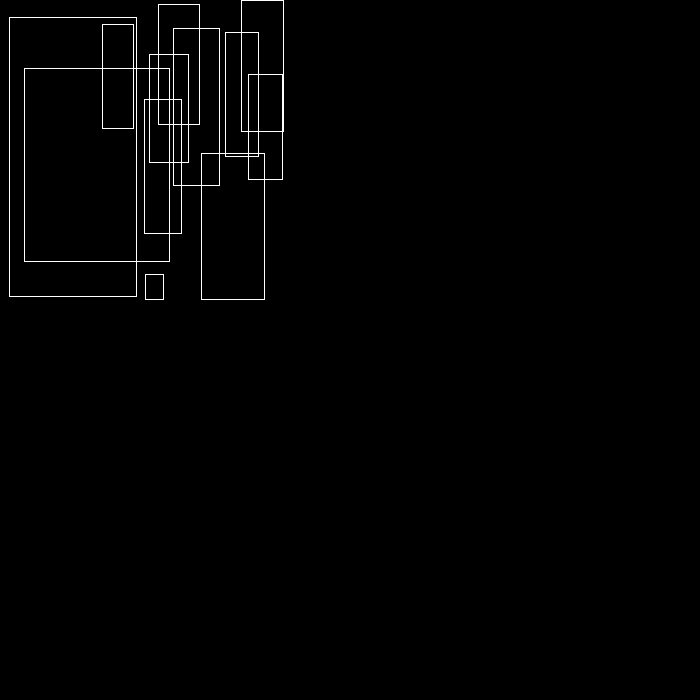

In [43]:
_image_tool = ImageTool(size=(700,700))

for index,_object in enumerate(_objects):
    _image_tool.drawBBox(_object.bbox)
    
_image_tool.image    

0 5 ((0, 900), (159, 1079))
4 4 ((640, 720), (799, 899))
0 4 ((0, 720), (159, 899))
8 3 ((1280, 540), (1439, 719))
7 3 ((1120, 540), (1279, 719))
6 3 ((960, 540), (1119, 719))
10 1 ((1600, 180), (1759, 359))


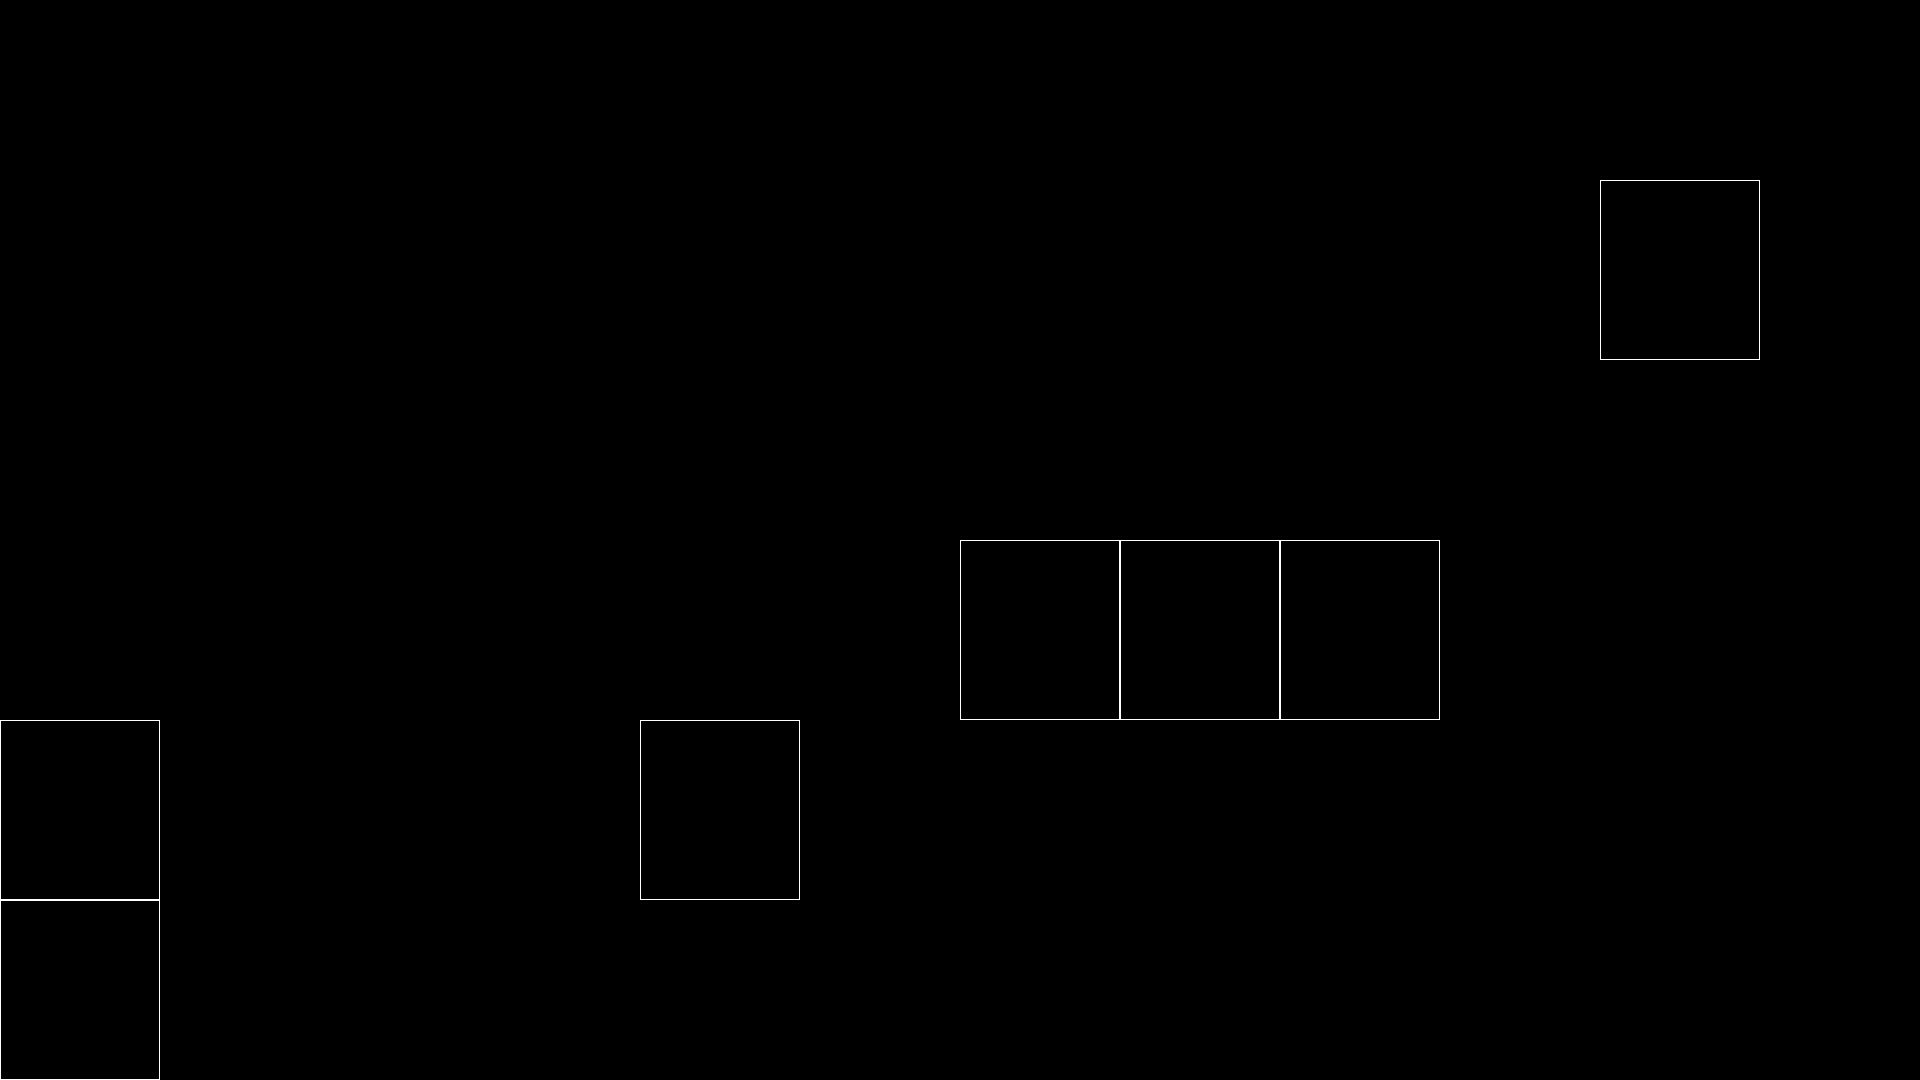

In [49]:
_image_tool = ImageTool(size=(1920,1080))
_filenames = _object_filenames_timestamp
for _filename in _filenames:
    bbox = box_to_bbox_world(_filename.x,_filename.y)
    _image_tool.drawBBox(bbox)
    print (_filename.x,_filename.y,box_to_bbox_world(_filename.x,_filename.y))
_image_tool.image            

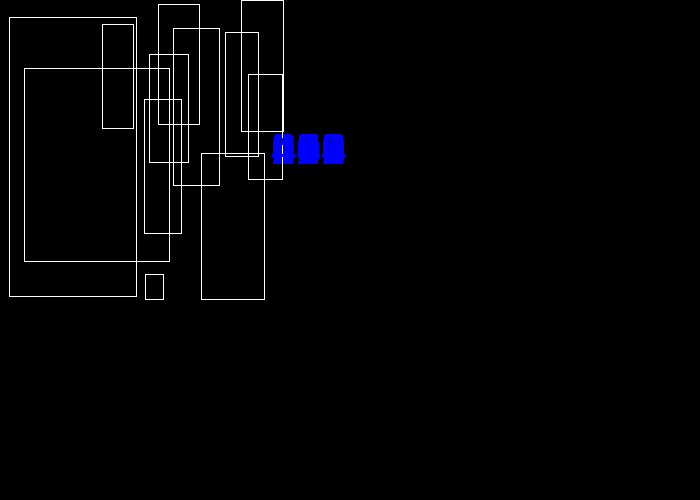

In [50]:
_image_tool = PoseImageTool(size=(700,500))

for index,_object in enumerate(_objects):
     add_object_to_image(_image_tool,_object,index)
    
_image_tool.image    

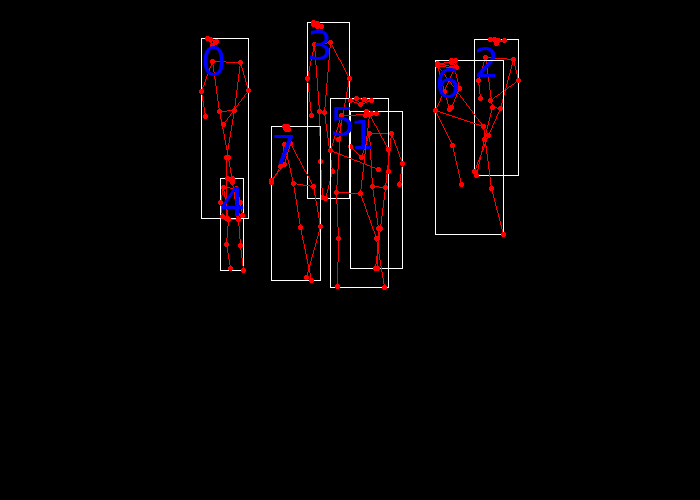

In [51]:
_image_tool = PoseImageTool(size=(700,500))

for index,_pose in enumerate(_poses):
     add_pose_to_image(_image_tool,_pose,index)
    
_image_tool.image    